In [4]:
import numpy as np
from scipy.optimize import fsolve
from IPython.display import Latex

## Problem 5.

Assuming $\mathscr{l}_t=1$ and the wage will be zero since labor ddoes not appear in the utility function of HH. The characterizing equations are as follows:

$$ c_t = (1 - \tau) [(r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$

$$c_t^{-\gamma} = \beta E_t \{ c_t^{-\gamma} [(r_{t+1} - \delta)(1-\tau) + 1 ]\} $$

$$r_t = \alpha K_t^{\alpha - 1} (e^{z_t} L_t) ^ {1 - \alpha}$$


$$ \tau [(r_t - \delta) k_t] = T_t $$

$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

The steady-state equations are as follows:

$$ \overline{c} = (1 - \tau) [ (\overline{r} - \delta) \overline{k}] + \overline{k} + \overline{T} - \overline{k} $$

$$\overline{c}^{-\gamma} = \beta E_t \{ \overline{c}^{-\gamma} [(\overline{r} - \delta)(1-\tau) + 1 ]\} $$

$$\bar{r_t} = \alpha \overline{K}^{\alpha - 1} (e^{z_t}) ^ {1 - \alpha}$$

$$ \tau [(\overline{r} - \delta) \overline{k}] = \overline{T} $$

$$ z_t = \overline{z} $$

Solving for $\overline{K}$ and $\overline{r}$:

In [5]:
gamma = 2.5
beta = .98
alpha = .4
delta = .1
tau = .05

In [6]:
def stst_errors(states, *args):
    k_bar, r_bar = states
    gamma, beta, alpha, delta, tau = args
    
    err1 = 1 - beta * ((r_bar - delta) * (1 - tau) + 1)
    err2 = r_bar - alpha * k_bar **(alpha - 1)
    return np.array([err1, err2])

In [7]:
params = (gamma, beta, alpha, delta, tau)
inits = np.array([10, 0.04])
sol = fsolve(stst_errors, inits, args=params)


In [8]:
print('k_bar:', sol[0], 'r_bar:', sol[1])

k_bar: 7.28749795069 r_bar: 0.121482277121


## Problem 6.

In [9]:
gamma = 2.5
beta = .98
alpha = .4
delta = .1
tau = .05
xi = 1.5
a = 0.5
params = (alpha, beta, gamma, delta, tau, xi, a)

Characterizing equations are as follows:

$$ c_t = (1 - \tau) [w_t \mathscr{l}_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$

$$c_t^{-\gamma} = \beta E_t \{ c_t^{-\gamma} [(r_{t+1} - \delta)(1-\tau) + 1 ]\} $$

$$ a(1 - l_t)^{- \xi} = c_t^{- \gamma} w_t (1 - \tau)$$

$$r_t = \alpha K_t^{\alpha - 1} (e^{z_t} L_t) ^ {1 - \alpha}$$

$$w_t = (1-\alpha) (e^{z_t})^{1-\alpha} \left( \frac{K_t}{L_t}\right)^{\alpha}$$

$$ \tau [w_t\mathscr{l}_t + (r_t - \delta) k_t] = T_t $$

$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

The steady-state equations are as follows:

$$ \overline{c} = (1 - \tau) [\overline{w} \bar{\mathscr{l}_t} + (\overline{r} - \delta) \overline{k}] +  \overline{T} $$

$$\overline{c}^{-\gamma} = \beta \overline{c}^{-\gamma} [(\overline{r} - \delta)(1-\tau) + 1 ] $$

$$ a(1 - \bar{l}_t)^{- \xi} = c_t^{- \gamma} \bar{w}_t (1 - \tau)$$

$$\bar{r_t} = \alpha \overline{K}^{\alpha - 1} (e^{z_t}\bar{L}) ^ {1 - \alpha}$$

$$\bar{w}_t = (1-\alpha) (e^{\bar{z}})^{1-\alpha} \left( \frac{\bar{K}_t}{\bar{L}_t}\right)^{\alpha}$$


$$ \tau [\overline{w}\bar{\mathscr{l}}_t + (\overline{r} - \delta) \overline{k}] = \overline{T} $$

$$ z_t = \overline{z} =0$$

Moreover we know that $k=K$ and $\mathscr{l}=L$.

In [10]:
def errors(inits, *args):
    alpha, beta, gamma, delta, tau, xi, a = args
    c, w, r, k, T, l = inits
    
    err1 = c - (1 - tau) * (w*l + (r - delta)*k) - T
    err2 = (c **(-1*gamma) - beta * (c ** (-1*gamma)) * ((r - delta)*(1 - tau) 
                                   + 1 ))
    err3 = a/((1 - l)**xi) - 1/(c ** gamma) * w * (1 - tau)
    err4 = r - alpha * (k / l) ** (alpha - 1)
    err5 = w - (1 - alpha) * (k / l) ** alpha
    err6 = tau * (w * l + (r - delta)*k) - T
    
    return np.array([err1, err2, err3, err4, err5, err6])

In [11]:
inits_6 = np.array([0.5, 1.2, 0.5, 0.5, 0.5, 0.5])
ss = fsolve(errors, inits_6, args=params)

print('Steady State values')
print('c:',ss[0], 'w:',ss[1], 'r:',ss[2], 'k:',ss[3], 'T:',ss[4], 'l:',ss[5])

Steady State values
c: 0.860703206089 w: 1.32795276825 r: 0.121482277137 k: 4.22522902549 T: 0.0430351603045 l: 0.579791453133


## Problem 8.

In [222]:
import matplotlib.pyplot as plt
from numba import jit

In [223]:
alpha = .35
beta = .98
rho = .9
sigma = .02
mu = 0
gridsize = 25
gridrange = 2 * 5 * sigma
stepsize = gridrange / (gridsize -1)

In [224]:
from rouwen import rouwen

pi, zvec = rouwen(rho, mu, step=stepsize, num=gridsize)

In [225]:
pi.sum(axis=1) # [z in rows, z_prime in cols]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [226]:
# set up the grid for k
# analytical solution for the steady state k_star
k_star = (1/(beta*alpha))**(1/(alpha-1))
k_ub = 1.5 * k_star
k_lb = 0.5 * k_star
num = 25
kvec = np.linspace(k_lb, k_ub , num)

In [227]:
# calcuate the utility for all possible combinations k, k' and z'

def utility(alpha, zvec, kvec, k_prime):
    '''
    OUT: u will have shape 25 x 25 where each row i contains all possible 
    products of z_i and all elements in kvec. Columns j correspond 
    to a fixed k_j.
    '''
    u = np.log(np.outer(np.exp(zvec) , kvec ** alpha) - k_prime)
    return u

u = np.zeros((len(zvec), num, num))
# loop over all possible values for k_prime
# u[z, k, k'] is the utility corresponding to those values
for h, k_prime in enumerate(kvec):
        u[:,:,h] = utility(alpha, zvec, kvec, k_prime)

In [228]:
# the loop for the VFI
@jit
def get_VF(V, Vmat, u, zgrid, num, beta):
    for i in range(len(zgrid)):# loop over z'
        for j in range(num): # loop over k
            for h in range(num): #loop over k'
                Vmat[i, j, h] = u[i, j, h] + beta * V[i, h]
    
    return Vmat

In [229]:
Vmat = np.zeros((num, num, num))
TV = np.zeros((num, num))
V_test = get_VF(TV, Vmat, u, zvec, num, beta)
TV_test = V_test.max(axis=2)
TV_test.shape

(25, 25)

In [230]:
import time
def VFI(VF=None, u=None, shocks=None, pi=None, beta=None, num=None,
        VFtol=1e-3, VFmaxiter=3000):
    
    PF = np.ones((num, num), dtype=int)
    total_start_time = time.clock()
    V = np.zeros((num, num))
    Vmat = np.zeros((num, num, num))
    VFiter = 0
    VFdist = 3
    errors = []
    while VFdist > VFtol and VFiter < VFmaxiter:
        
        TV = np.copy(V)
        V = pi @ V
        
        Vmat = VF(V, Vmat, u, shocks, num, beta)
        V = Vmat.max(axis=2) # choose the highest Value w.r.t k'
        VFdist = (np.absolute(TV - V)).max()
        errors.append(VFdist)

        VFiter += 1

    time_elapsed = time.clock() - total_start_time
    if VFiter < VFmaxiter:
        print('\nValue function converged after', VFiter, 'iterations')
        #print('VFI took ', VFI_time, ' seconds to solve')
    else:
        print('Value function did not converge')

    PF = np.argmax(Vmat, axis=2)
    print('\ntotal time elapsed:', time_elapsed, 'seconds')
    
    return PF, V, errors

In [231]:
pf, vmax, errs = VFI(VF=get_VF, u=u, shocks=zvec, pi=pi, beta=beta, num=num)


Value function converged after 343 iterations

total time elapsed: 0.026349891029894934 seconds


In [232]:
def plot_valfuns(kvec, VFs):
    _, Num = VFs.shape 
    fig, ax = plt.subplots(figsize=(9, 6))
    #ax.set_ylim(-40, 10)
    ax.set_xlim(np.min(kvec), np.max(kvec))
    for k in range(Num):
        #lb = 'z={}'.format(np.around(z_shocks[k], 2))
        ax.plot(kvec, VFs[:,k], color=plt.cm.jet(k / Num), lw=2, alpha=0.6)
    
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.ylabel('Value Function')
    plt.xlabel('Size of Capital Stock')
    plt.title('Value Function')
    plt.show()

<IPython.core.display.Javascript object>


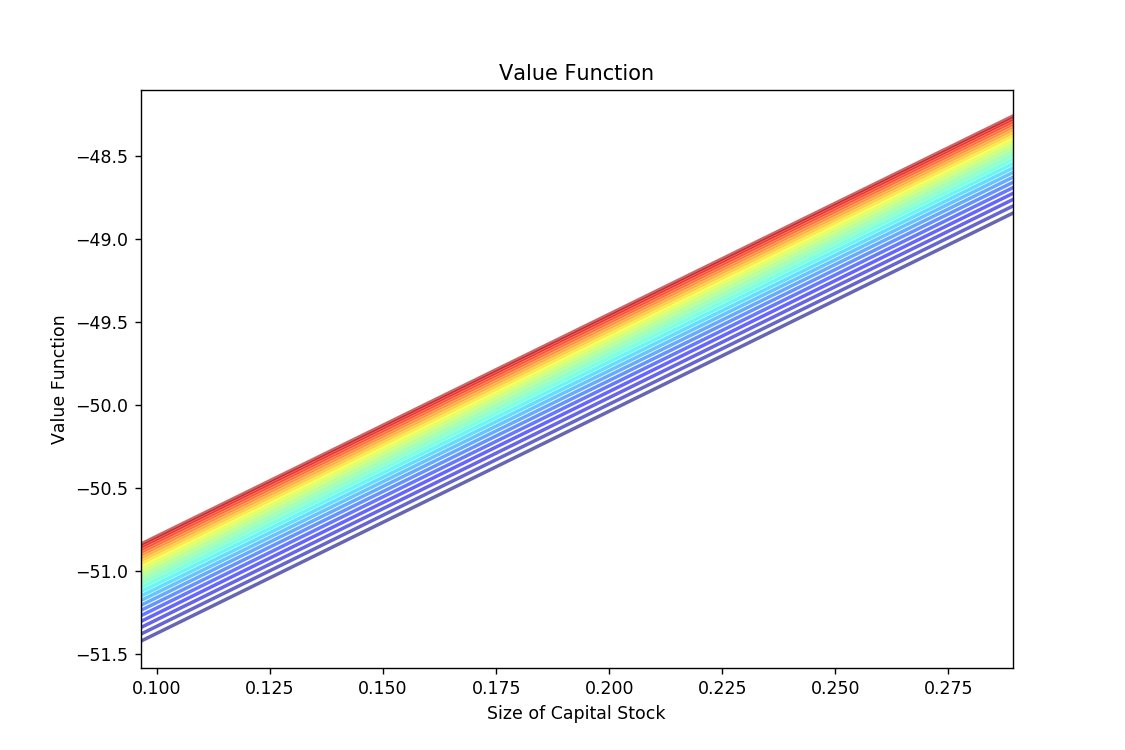

C:\Users\Max\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [233]:
plot_valfuns(kvec, vmax)

<IPython.core.display.Javascript object>


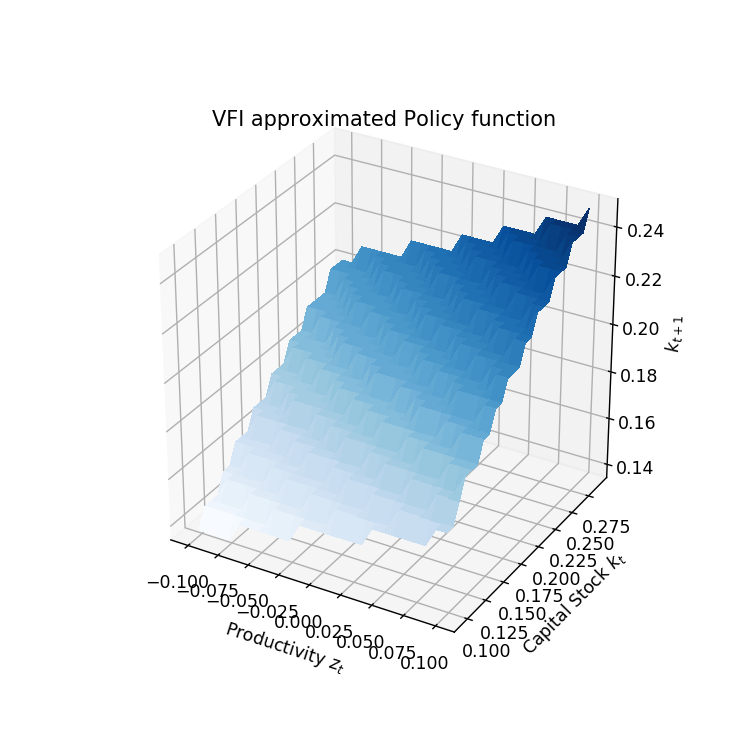

In [245]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#%matplotlib notebook

optK = kvec[pf]

zmat, kmat = np.meshgrid(kvec, zvec)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optK, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)

#ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Productivity $z_t$')
ax.set_ylabel(r'Capital Stock $k_t$')
ax.set_zlabel(r'$k_{t+1}$')
plt.title('VFI approximated Policy function')
plt.show()

In [236]:
# compute closed form solution
def cl(alpha, beta, kvec, zvec):
    kprime = alpha*beta* np.outer(np.exp(zvec), kvec**alpha)
    return kprime
k_anal = cl(alpha, beta, kvec, zvec)

<IPython.core.display.Javascript object>


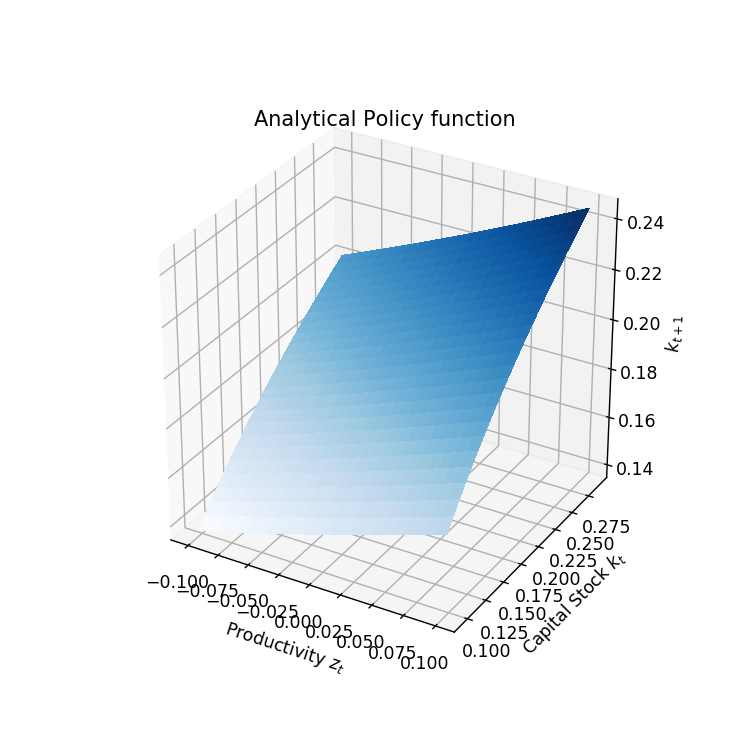

In [244]:
zmat, kmat = np.meshgrid(kvec, zvec)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, k_anal, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.plot
#ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Productivity $z_t$')
ax.set_ylabel(r'Capital Stock $k_t$')
ax.set_zlabel(r'$k_{t+1}$')
plt.title('Analytical Policy function')
plt.show()